# A Linear Support Vector Machine Classifier

In [374]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

## Binary Classification

A binary classifier is a function for predicting a binary outcome $y = \pm 1$ based the values of $p$ features contained in a vector $x\in \mathbb{R}^p$.  A successful binary classifier will predict $y$ with high precision and high recall.

* **Precision**. The number of real positives divided by the number of predicted positives. High precision implies a low false positive rate.

* **Recall**. The number of real positives divided by number of actual positives. High recall test implies a low false negative rate.

Consider, for example, an device that rejects counterfeit banknotes for a vending machine. A false positive would mean the vending machine would rejects a genuine banknote which would be frustrating to a user. Users of the vending machine, therefore, would prefer a device with high precision. 

On the other hand, a false negative would mean the vending machine would accept a counterfeit banknote. The owner of the vending machine, therefore, would prefer a device with high reccall.

false positive  a counterfeit banknote, clearly an undesirable outcome for the seller. The seller would be interested in high precision. A buyer, however, may be frustrated if a valid banknote is needlessly rejected by the vending machine. The buyer would be interested in high recall.

The challenge of developing binary classifiers is to find features, and functions to evaluate those features, that provide the precision and recall needed for a particular application.

## Linear Support Vector Machines (SVM)

Notes:

* http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-linear-svm/


A linear support vector machine is a binary classifier that uses linear form to determine the classification. 

$$y = \text{sgn}\ ( w^\top x + b)$$

where $w\in \mathbb{R}^p$ is a set of coefficients and $w^\top x$ is the dot product. In effect, the linear function divides the feature space $\mathbb{R}^p$ with a hyperplane specified by $w$ and $b$.

Given a training set consists of $n$ observations $(x_i, y_i)$ where $y_i = \pm 1$ and $x_i\in\mathbb{R}^p$ for $i=1, \dots, n$, the computational task is to find coefficients $w\in\mathbb{R}^p$ and $b\in\mathbb{R}$ to achieve high precision and high recall for a validation set.

A point  $(x_i, y_i)$ in the validation set is successfully classified if the value

$$ y_i (w^\top x_i + b) > 0 $$

whereas the point is mis-classified if 

$$ y_i (w^\top x_i + b) < 0 $$

Given parameters $w$ and $b$, the **hinge-loss** function is defined as

$$\ell(x, y) = \left(1 - y(w^\top x + b)\right)_+$$

using the notation $\left(z\right)_+ = \max(0, z)$. This loss function has several properties that make it useful fitting linear support vector machine.  For a mis-classified point, the hinge-loss function grows in proportion to the magnitude of 

$$1 - y_i\left(w^\top x_i + b\right)$$

which we call the *scoring* function. The scoring function assigns a large loss to data far away from the separation plane.  For correctly classified points the scoring function is reduced to a value no smaller than zero. A soft penalty is assigned to points that correctly classified but still near the separating hyperplane. 

One approach to fitting a linear SVM is to assign a regularization term for $w$. In most formulations a norm $\|w\|$ is used for regularization, commonly a sum of squares such as $\|w\|_2^2$. Another choice is $\|w\|_1$ which, similar to Lasso regression, may result in sparse weighting vectors $w$ indicating which elements of the feature vector can be neglected for classification purpose. These considerations result i the objective function

$$\min_{w, b}\left[ \frac{1}{n}\sum_{i=1}^n \left(1 - y_i(w^\top x_i + b)\right)_+ + \lambda \|w\|_1\right]$$

which can be solved by linear programming.

$$
\begin{align*}
\min_{z, w, b}\ & \frac{1}{n}  \sum_{i=1}^n z_i + \lambda \|w\|_1 \\
\text{s.t.}\qquad z_i & \geq 1 - y_i(w^\top x_i + b) & \forall i = 1, \dots, n \\
z_i & \geq 0 & \forall i = 1, \dots, n
\end{align*}
$$

This is the primal optimization problem in decision variables $w\in\mathbb{R}^p$, $b\in\mathbb{R}$, and $z\in\mathbb{R}^n$, a total of $n + p + 1$ unknowns with $2n$ constraints.

## The SVM Dual

Creating the dual of the support vector machine will turn out to have practical consequences. Creating the dual requires a differentiable objective function. For this reason, the regularization term is changed to the 2-norm of $w$

$$
\begin{align*}
\min_{z, w, b}\  \frac{1}{2} \|w\|_2^2 + \frac{c}{n}  \sum_{i=1}^n z_i \\
\\
\text{s.t.}\qquad 1 - y_i(w^\top x_i + b) - z_i & \leq 0 & \forall i = 1, \dots, n \\
- z_i & \leq 0 & \forall i = 1, \dots, n
\end{align*}
$$

where the regularization parameter shifted to $c$, and the constraints restated in standard form. This is a quadratic problem in $n + p + 1$ variables and $2n$ constraints.

The Lagrangian $\mathcal{L}$ is 

$$
\begin{align*}
\mathcal{L} & = \frac{1}{2} \|w\|_2^2 + \frac{c}{n}\sum_{i=1}^n z_i + \sum_{i=1}^n \alpha_i (1 - y_i(w^\top x_i + b) - z_i) + \sum_{i=1}^n \beta_i (-z_i) \\
\end{align*}
$$

where $2n$ non-negative Lagrange multipliers $\alpha_i \geq 0$ and $\beta_1 \geq 0$ have been introduced for $i \in 1,\dots,n$. Intuitively, the Lagrange variables are penalty weights assigned to the inequality constraints introduced into a modified objective function. If the penalties are large enough then the constraints will be satisfied.


$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial z_i} & = \frac{c}{n} - \alpha_i - \beta_i = 0 \implies 0 \leq \alpha_i \leq \frac{c}{n}\\
\frac{\partial \mathcal{L}}{\partial w} & = w  - \sum_{i=1}^n \alpha_i y_i x_i = 0 \implies  w = \sum_{i=1}^n \alpha_i y_i x_i \\
\frac{\partial \mathcal{L}}{\partial b} & = -\sum_{i=1}^n \alpha_i y_i = 0 \implies \sum_{i=1}^n \alpha_i y_i = 0 \\
\end{align*}
$$

The dual problem is then

$$
\begin{align*}
\max_{\alpha_i}\ &  \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n \alpha_i \alpha_j y_i y_j ( x_i^\top x_j ) \\
\text{s. t.}\quad & \sum_{i=1}^n \alpha_i y_i = 0 \\
& \alpha_i \in \left[0, \frac{c}{n}\right] & i = 1, \dots, n \\
\end{align*}
$$

which is a quadratic program like the primal, but with $n$ decision variables $\alpha_i$ and $n + 1$ constraints. The dual has $p+1$ fewer decision variables and $n$ fewer constraints than the primal. Give a solution $\alpha_i^*$, the 

$$
\begin{align*}
w^* & = \sum_{i=1}^n \alpha_i^* y_i x_i \\
b^* & = y_k - (w^*)^\top x_k & \text{for any }k\ni 0 < \alpha_k < \frac{c}{n} \\
\end{align*}
$$

This is a remarkable result.

$$
\begin{align*}
w^* & = \sum_{i=1}^n \alpha_i^* y_i x_i \\
b^* & = y_k - \sum_{i=1}^N \alpha_i^* y_i x_i^\top x_k & \text{for any }k\ni 0 < \alpha_k < \frac{c}{n} 
\end{align*}
$$


The classifier is then







## Data Set 

The following data set contains data from a collection genuine and counterfeit banknote specimens. The data includes four continuous statistical measures obtained from the wavelet transform of banknote images and a binary variable where 0 indicates genuine and 1 indicates counterfeit.

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

In [385]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

df = pd.read_csv("data_banknote_authentication.txt", header=None)
df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

# create training and validation test sets
df_train, df_test = train_test_split(df, test_size=0.2)

df_train = df_train.reset_index()
X_train = df_train[["variance", "skewness", "curtosis", "entropy"]]
y_train = 2*df_train["class"] - 1

df_test = df_test.reset_index()
X_test = df_test[["variance", "skewness", "curtosis", "entropy"]]
y_test = 2*df_test["class"] - 1

center = X_train.mean()
scale = X_train.std()

# center and scale with training d
X_train = (X_train - center) / scale
X_test = (X_test - center) / scale

## Dimensionality Reduction with PCA

To provide an effective visualization, for a first attempt an SVM classifer we  will reduce the four observed features to the two dominant components returned by [principal component analysis](https://scikit-learn.org/stable/modules/decomposition.html#pca) (PCA). 

* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

### Linear PCA

     variance  skewness  curtosis   entropy
PC0 -0.229949 -0.639035  0.610101  0.408086
PC1 -0.768108  0.033997  0.160167 -0.619032
PC2  0.591545 -0.094823  0.526893 -0.602882
PC3 -0.084899  0.762553  0.569655  0.294615


<BarContainer object of 4 artists>

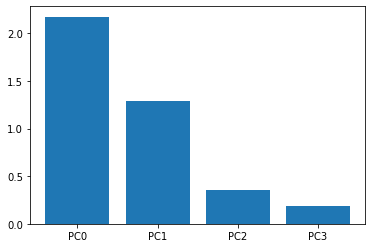

In [386]:
n, p = X_train.shape

pca = PCA(n_components=p).fit(X_train)

# format PCA loadings and varianace ratios
loadings = pd.DataFrame(pca.components_, index=[f"PC{_:d}" for _ in range(p)])
loadings.columns = X_train.columns
print(loadings)
plt.bar(["PC0", "PC1", "PC2", "PC3"], pca.explained_variance_)

<AxesSubplot:xlabel='PC0', ylabel='PC1'>

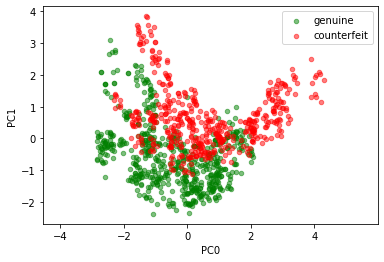

In [387]:
pca = PCA(n_components=2)
X_train_pca = pd.DataFrame(pca.fit(X_train).transform(X_train), columns=["PC0", "PC1"])

def Xy_plot(X, y):
    fig, ax = plt.subplots()
    X[y==-1].plot(x=0, y=1, kind="scatter", ax=ax, c='g', alpha=0.5, label="genuine")
    X[y== 1].plot(x=0, y=1, kind="scatter", ax=ax, c='r', alpha=0.5, label="counterfeit")
    ax.axis('equal')
    return ax

Xy_plot(X_train_pca, y_train)

### Kernel PCA

The first two principal components of linear PCA provides some, but not complete, discrimination between the two classes of banknotes. This motivates a look at kernel PCA. Kernel PCA embeds the feature space $x\in\mathbb{R}^p$ in a higher dimensional space. Essential to the technique is to perform the embedding in such a way that the inner product in the higher dimensional space can be computed using a 'kernel' function in $\mathbb{R}^p$. (This is known as the 'kernel trick', also known as Mercer's theorem.)

After several trials with different kernels and settings, a radial basis function kernel appears to separate the two classes of banknotes using two components.

<AxesSubplot:xlabel='KPC0', ylabel='KPC1'>

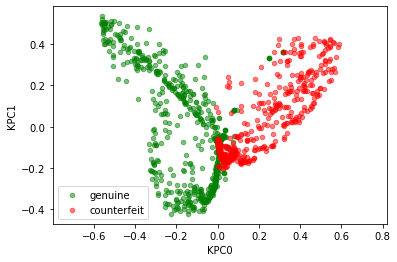

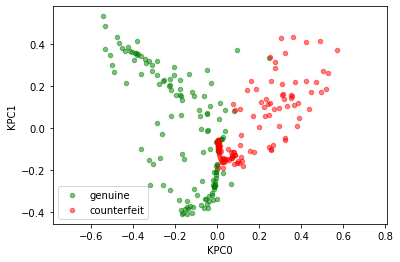

In [388]:
def kpca_transform(X, X_train=X_train):
    kpca = KernelPCA(n_components=2, kernel="rbf", gamma=1.5).fit(X_train)
    X_kpca = pd.DataFrame(kpca.transform(X))
    X_kpca.columns = ["KPC0", "KPC1"]
    return X_kpca
    
Xy_plot(kpca_transform(X_train), y_train)
Xy_plot(kpca_transform(X_test), y_test)

## Fit SVM to the features

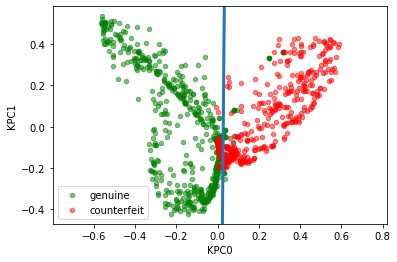

In [389]:
def svm_fit(X, y, alpha=0):
    X = X.to_numpy()
    n, p = X.shape
    y = np.reshape(y.to_numpy(), (n, 1))
    w = cp.Variable((p, 1))
    b = cp.Variable()
    hinge_loss = cp.sum(cp.pos(1 - cp.multiply(y, X @ w + b)))
    problem = cp.Problem(cp.Minimize(hinge_loss/n + alpha*cp.norm(w, 1)))
    problem.solve()
    return w.value, b.value

def svm_plot(w, b, ax):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.plot([xmin, xmax], [-(w[0]*xmin + b)/w[1], -(w[0]*xmax + b)/w[1]], lw=3)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# train svm on kpca of X_train
w, b = svm_fit(kpca_transform(X_train), y_train)

# plot kpca of X_train and svm
ax = Xy_plot(kpca_transform(X_train), y_train)
svm_plot(w, b, ax)

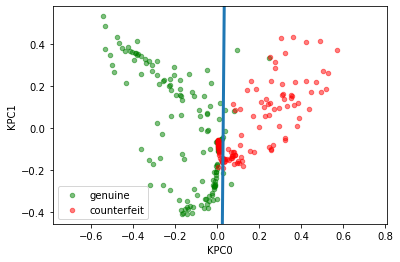

In [390]:
# train
w, b = svm_fit(kpca_transform(X_train), y_train)

# compare to test data
ax = Xy_plot(kpca_transform(X_test), y_test)
svm_plot(w, b, ax)

### Test SVM classifier

In [392]:
import pandas as pd

def svm_pred(w, b, X):
    return np.sign(X @ w + b)[0]

# train svm
w, b = svm_fit(kpca_transform(X_train), y_train)

# predict
y_pred = svm_pred(w, b, kpca_transform(X_test))

def compare(y_test, y_pred):
    tp = sum((y_test == 1) * (y_pred == 1))
    tn = sum((y_test == -1) & (y_pred == -1))
    fp = sum((y_test == -1) * (y_pred == 1))
    fn = sum((y_test == 1) * (y_pred == -1))
    print(f" true positives = {tp}")
    print(f"false positives = {fp}")
    print(f" true negatives = {tn}")
    print(f"false negatives = {fn}") 
    print(f"      precision = {tp/(tp + fp):5.3f}")
    print(f"         recall = {tp/(tp + fn):5.3f}")
    

compare(y_test, y_pred)

 true positives = 84
false positives = 7
 true negatives = 143
false negatives = 41
      precision = 0.923
         recall = 0.672


## Full featured SVM

In [393]:
# train
w, b = svm_fit(X_train, y_train)

# compare to test data
y_pred = svm_pred(w, b, X_test)

compare(y_test, y_pred)

 true positives = 124
false positives = 2
 true negatives = 148
false negatives = 1
      precision = 0.984
         recall = 0.992


## Pyomo Implementation

In [397]:
import pyomo.environ as pyo

def pyomo_svm_fit(X, y, alpha=0):
    
    n, p = X.shape
    
    m = pyo.ConcreteModel()
    
    m.n = pyo.RangeSet(0, n-1)
    m.p = pyo.RangeSet(0, p-1)
    
    m.w = pyo.Var(m.p)
    m.b = pyo.Var()
    m.z = pyo.Var(m.n, domain=pyo.NonNegativeReals)
    m.wpos = pyo.Var(m.p, domain=pyo.NonNegativeReals)
    m.wneg = pyo.Var(m.p, domain=pyo.NonNegativeReals)
    
    @m.Constraint(m.n)
    def hinge_loss(m, n):
        return m.z[n] >= 1 - y[n]*(sum(m.w[p]*X.iloc[n,p] for p in m.p) + m.b)
    
    @m.Objective(sense=pyo.minimize)
    def objective(m):
        return sum(m.z[n] for n in m.n)/n + alpha * sum(m.wpos[p] + m.wneg[p] for p in m.p)
    
    pyo.SolverFactory('glpk').solve(m)
    
    w = np.array([m.w[p]() for p in m.p])
    b = m.b()
    
    return w, b
    
pyomo_svm_fit(X_train, y_train)


(array([-10.3785571 , -11.83047461, -10.61068032,  -0.57274353]),
 -5.10017690921349)

In [398]:
print(svm_fit(X_train, y_train))
print(pyomo_svm_fit(X_train, y_train))

(array([[-10.3785571 ],
       [-11.83047461],
       [-10.61068032],
       [ -0.57274353]]), array(-5.10017691))
(array([-10.3785571 , -11.83047461, -10.61068032,  -0.57274353]), -5.10017690921349)
